# Tutorial

In [ ]:
using EISAnalysis

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


## Circuit Elements

This package includes Resistors, Capacitors, CPEs, Inductors, and Warburgs which can be called through the following variables:

`r, c, q, l, wo, ws`

with default parameter values. They are all `CircuitElement` types. Here let's call a resistor and a capacitor

In [2]:
r

Resistor(1.0, Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im  …  1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im])

In [15]:
c

Capacitor(1.0, Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[0.0 - 1.0e-5im, 0.0 - 1.3894954943731376e-5im, 0.0 - 1.93069772888325e-5im, 0.0 - 2.682695795279726e-5im, 0.0 - 3.72759372031494e-5im, 0.0 - 5.179474679231211e-5im, 0.0 - 7.196856730011521e-5im, 0.0 - 0.0001im, 0.0 - 0.00013894954943731376im, 0.0 - 0.00019306977288832504im  …  0.0 - 51.79474679231211im, 0.0 - 71.9685673001152im, 0.0 - 100.0im, 0.0 - 138.94954943731375im, 0.0 - 193.06977288832502im, 0.0 - 268.2695795279726im, 0.0 - 372.759372031494im, 0.0 - 517.947467923121im, 0.0 - 719.685673001152im, 0.0 - 1000.0im])

Each circuit element stores a frequency vector `ω` and its AC impedance `Z` over that frequency.

Now we can generate all kinds of circuits, which themselves are also `CircuitElement` types

In [8]:
series_circuit = r-c
parallel_circuit = r/c
combined_circuit = r-r/c

Circuit(Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[1.0000000001 - 9.999999999e-6im, 1.0000000001930698 - 1.389495494104868e-5im, 1.0000000003727594 - 1.9306977281635643e-5im, 1.0000000007196856 - 2.6826957933490283e-5im, 1.0000000013894954 - 3.727593715135466e-5im, 1.0000000026826958 - 5.179474665336256e-5im, 1.0000000051794746 - 7.196856692735584e-5im, 1.00000001 - 9.999999900000002e-5im, 1.000000019306977 - 0.000138949546754618im, 1.000000037275936 - 0.0001930697656914686im  …  1.9996273795257427 - 0.01929978311379866im, 1.9998069674958532 - 0.013892272765783583im, 1.999900009999 - 0.00999900009999im, 1.9999482079357644 - 0.007196483989945467im, 1.999

You can easily plot circuits using the `plot_Nyquist` function

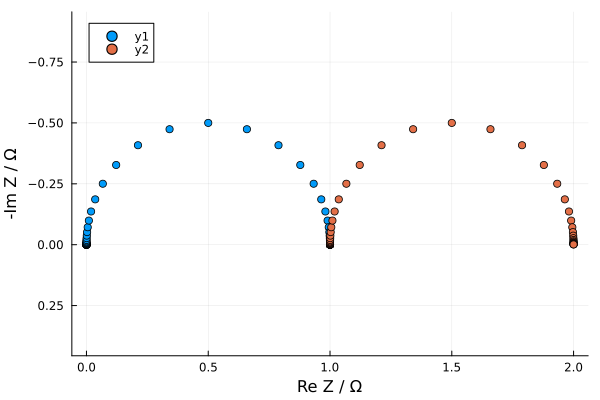

In [15]:
plt = plot_Nyquist(parallel_circuit,combined_circuit)

You can also quickly adjust the parameters of your circuit in the following way

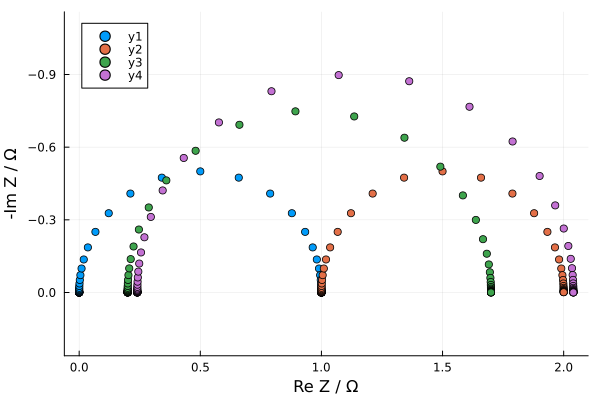

In [16]:
combined_circuit2 = 0.2r-1.5r/0.1c
combined_circuit3 = 1.2combined_circuit2
plot_Nyquist!(plt,combined_circuit2,combined_circuit3)

For elements like CPEs and Warburgs which have exponential parameters, you can change those parameters using `^`.

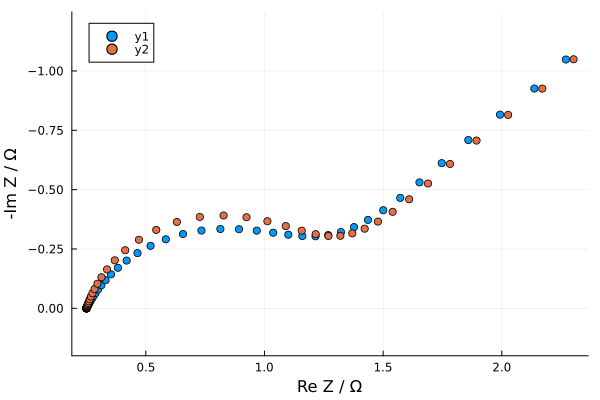

In [17]:
randles_circuit1 = 0.25r-(r-0.05wo^80)/2q^0.7
randles_circuit2 = 0.25r-(r-0.05wo^80)/2q^0.8
plot_Nyquist(randles_circuit1,randles_circuit2)

For fitting data, you can map `ω` from your dataset onto circuit elements

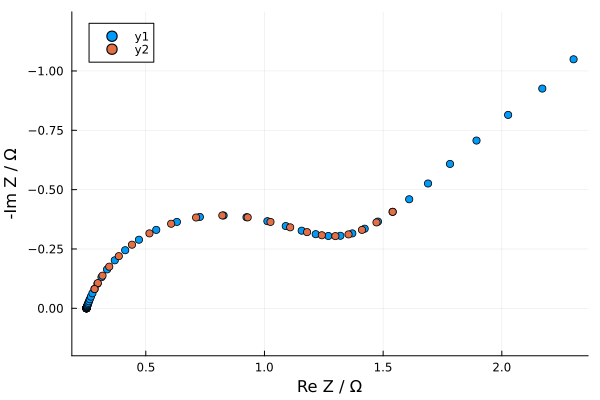

In [22]:
ω_data = collect(logrange(1e-02,1e01,20))
r_fit=r~ω_data
q_fit=q~ω_data
wo_fit=wo~ω_data
randles_circuit3 = 0.25r_fit-(r_fit-0.05wo_fit^80)/2q_fit^0.8
plot_Nyquist(randles_circuit2,randles_circuit3)